<a href="https://colab.research.google.com/github/medhajoshi2503/Python/blob/main/autotagging_paper_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall scikit-learn
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)
!pip install scikit-multilearn
!pip install scikit-learn
!pip install --upgrade scikit-learn
!pip install --upgrade scikit-learn
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import numpy as np
import re
import nltk
##import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 200)

##import tensorflow as tf
##from tensorflow import keras

import nltk
nltk.download('all')



from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import nltk
import warnings

warnings.simplefilter("ignore")

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 31.4 MB/s eta 0:00:00
1.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.6 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [2]:


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'archive'


import sys
sys.path.append('/drive/My Drive/{}'.format(FOLDERNAME))


%cd /content/drive/My\ Drive/$FOLDERNAME/

ques = pd.read_csv("/content/drive/MyDrive/archive/Questions.csv", encoding="ISO-8859-1")
tags = pd.read_csv("/content/drive/MyDrive/archive/Tags.csv", encoding="ISO-8859-1", dtype={'Tag': str})



ans = pd.read_csv("/content/drive/MyDrive/archive/Answers.csv", encoding="ISO-8859-1")




ques.head()
ans.head()
tags.head()

Mounted at /content/drive
/content/drive/My Drive/archive


,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [4]:
print('Ques shape: ', ques.shape)
print('Ans shape: ', ans.shape)
print('Tags shape: ', tags.shape)

Ques shape:  (1264216, 7)
Ans shape:  (2014516, 6)
Tags shape:  (3750994, 2)


In [6]:
import collections
import math
ans_per_question = collections.Counter(ans['ParentId'])
#{quesId: ansCount}
# { 406760: 408, 100420: 100, 40480: 69, 490420: 67, 226970: 55, 202750: 51, 17054000: 49 }
# ans_per_question.most_common() =>> [(406760, 408), (38210, 316), (23930, 129), (100420, 100)]
quesId,nosAnswers = zip(*ans_per_question.most_common())

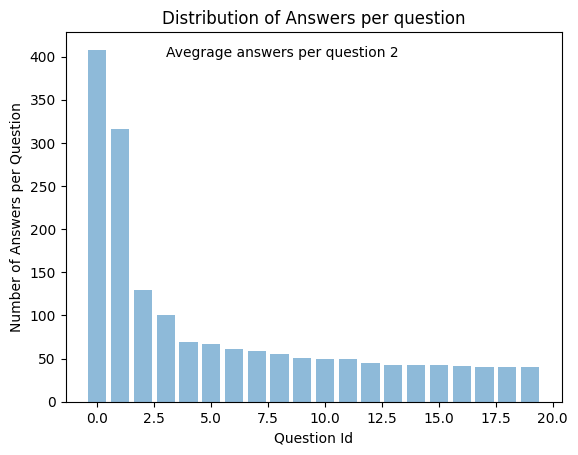

In [7]:
import matplotlib.pyplot as plt
N=20
plt.bar(range(N), nosAnswers[:N], align='center', alpha=0.5)
plt.ylabel('Number of Answers per Question')
plt.xlabel('Question Id')
plt.title('Distribution of Answers per question')
plt.text(3,400,"Avegrage answers per question "+str(math.ceil((np.mean(nosAnswers)))))

plt.show()

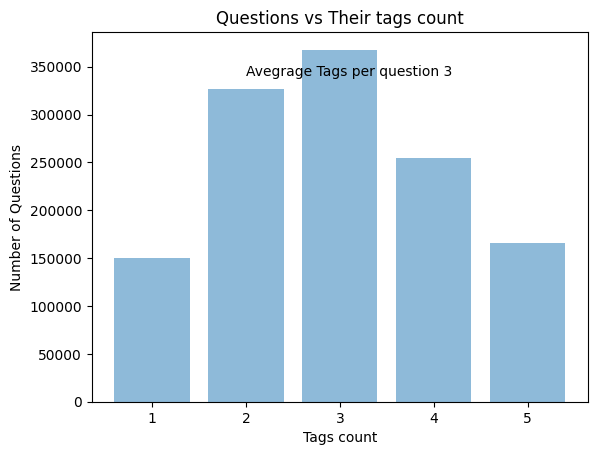

In [9]:
tags_per_question = collections.Counter(tags['Id'])
# { 406760: 8, 100420: 7, 40480: 6, 490420: 5, 226970: 5, 202750: 4, 17054000: 2 }
# ans_per_question.most_common() =>> [(406760, 8), (38210, 7), (23930, 6), (100420, 2)]
tags_freq_counter = collections.Counter(tags_per_question.values())

tags_count,nosQuestions = zip(*tags_freq_counter.most_common())
N=10
plt.bar(tags_count[:N], nosQuestions[:N], align='center', alpha=0.5)
plt.ylabel('Number of Questions')
plt.xlabel('Tags count')
plt.title('Questions vs Their tags count')
plt.text(2,340000,"Avegrage Tags per question "+str(math.ceil((np.mean(tags_count)))))

plt.show()

Popular tags


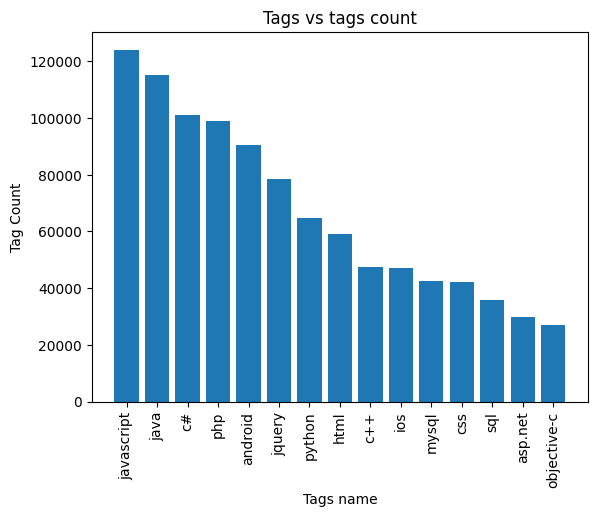

In [10]:
print('Popular tags')
tagCount =  collections.Counter(list(tags['Tag']))
tagName,freq = zip(*tagCount.most_common(15))
plt.bar(tagName, freq )
plt.xticks(rotation='vertical')
plt.ylabel('Tag Count')
plt.xlabel('Tags name')
plt.title('Tags vs tags count')
plt.show()

Popular tags


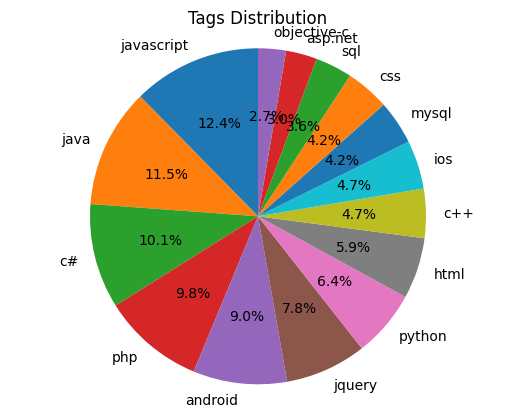

In [19]:


print('Popular tags')

# Assuming 'tags' and 'plt' are defined
tagCount = collections.Counter(list(tags['Tag']))
tagName, freq = zip(*tagCount.most_common(15))

# Create a pie chart
plt.pie(freq, labels=tagName, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Tags Distribution')
plt.show()


HEAT map

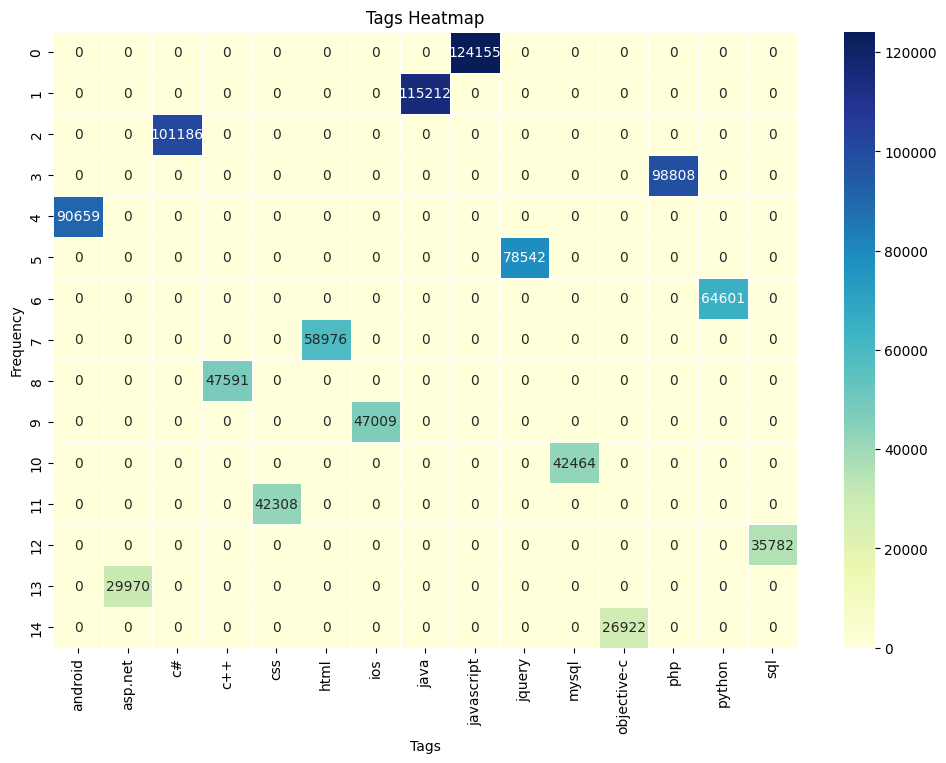

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'tags' is a DataFrame with tag data

# Create a DataFrame with tag counts
tag_counts = tags['Tag'].value_counts().head(15).reset_index()
tag_counts.columns = ['Tag', 'Count']

# Pivot the DataFrame for heatmap
heatmap_data = tag_counts.pivot(index=None, columns='Tag', values='Count').fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Tags Heatmap')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()


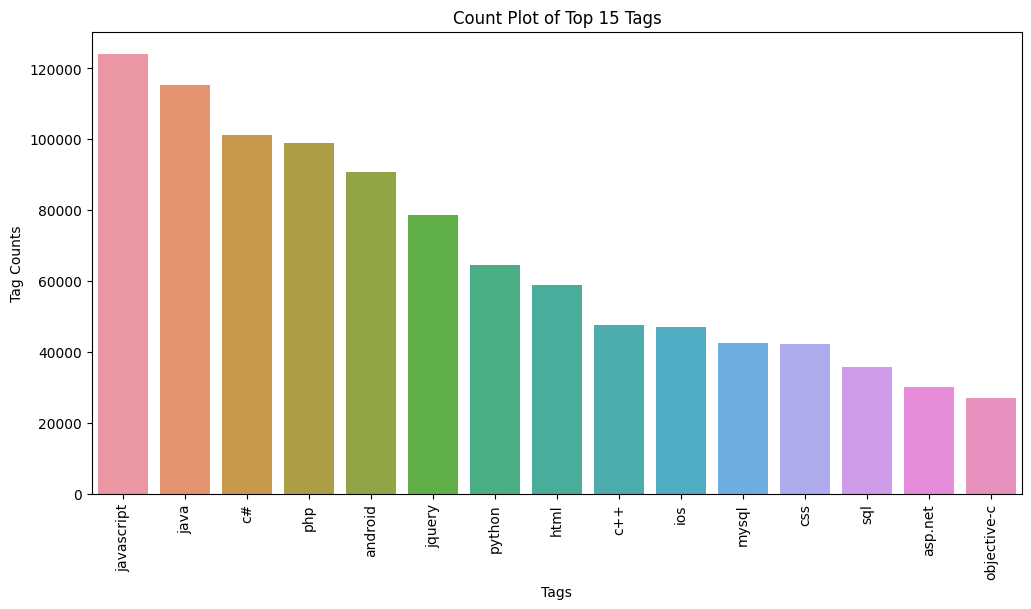

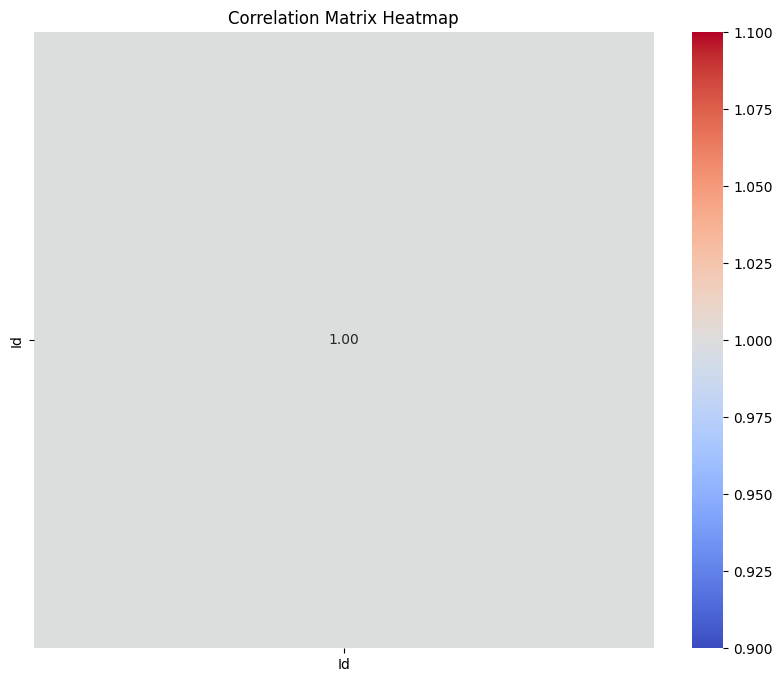

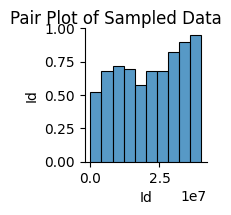

In [23]:
# Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Tag', data=tags, order=pd.value_counts(tags['Tag']).index[:15])
plt.title('Count Plot of Top 15 Tags')
plt.xlabel('Tags')
plt.ylabel('Tag Counts')
plt.xticks(rotation='vertical')
plt.show()

# Correlation Matrix Heatmap
correlation_matrix = tags.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair Plot
sns.pairplot(tags.sample(500), height=2)
plt.suptitle('Pair Plot of Sampled Data', y=1.02)
plt.show()

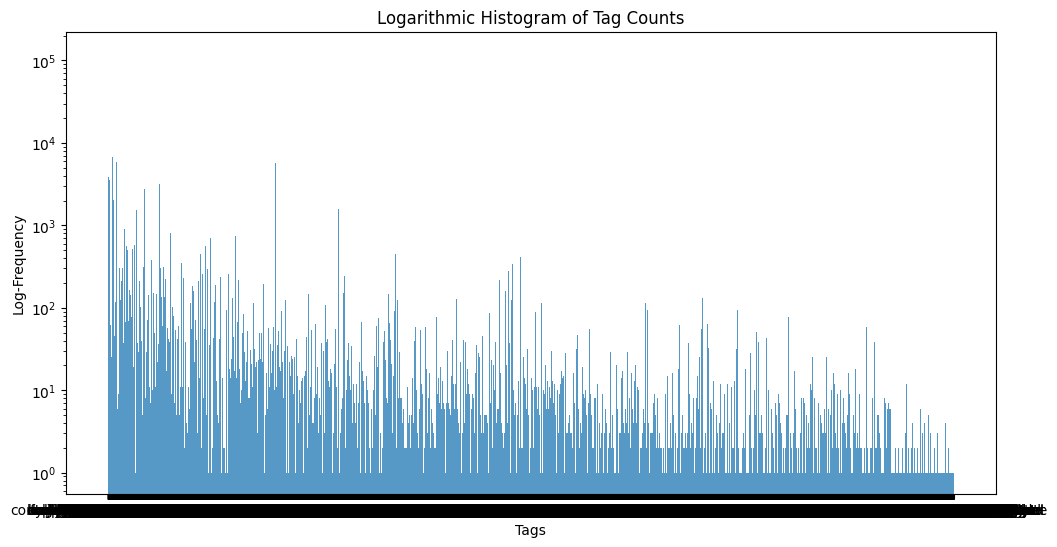

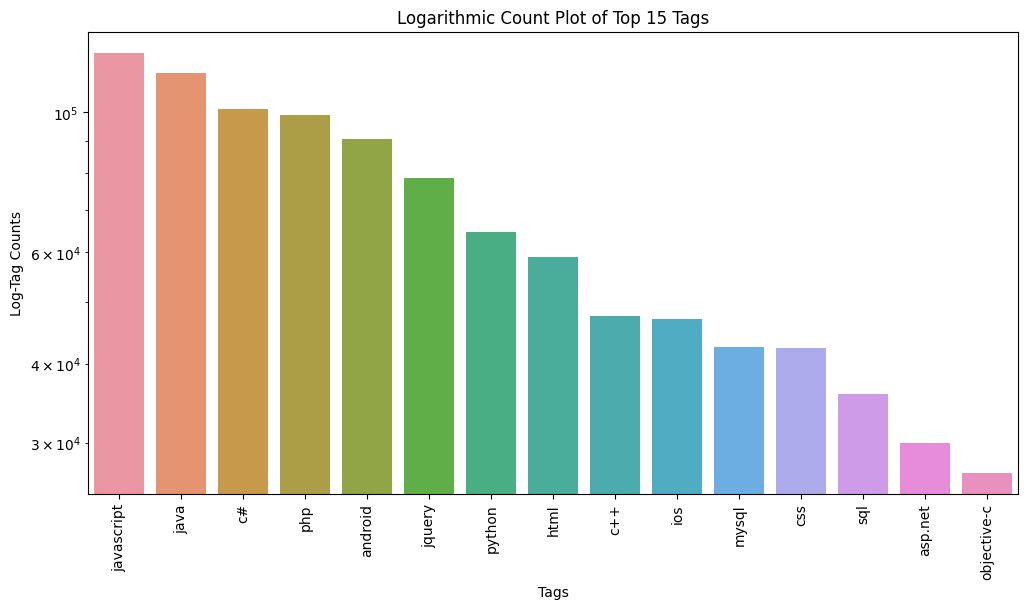

In [25]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'tags' is your DataFrame with a column 'Tag'
# Replace 'column_name' with the appropriate column name for your dataset

# Logarithmic Scale Histogram
plt.figure(figsize=(12, 6))
sns.histplot(tags['Tag'], bins=15, kde=False)
plt.yscale('log')
plt.title('Logarithmic Histogram of Tag Counts')
plt.xlabel('Tags')
plt.ylabel('Log-Frequency')
plt.show()

# Logarithmic Scale Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Tag', data=tags, order=pd.value_counts(tags['Tag']).index[:15])
plt.yscale('log')
plt.title('Logarithmic Count Plot of Top 15 Tags')
plt.xlabel('Tags')
plt.ylabel('Log-Tag Counts')
plt.xticks(rotation='vertical')
plt.show()




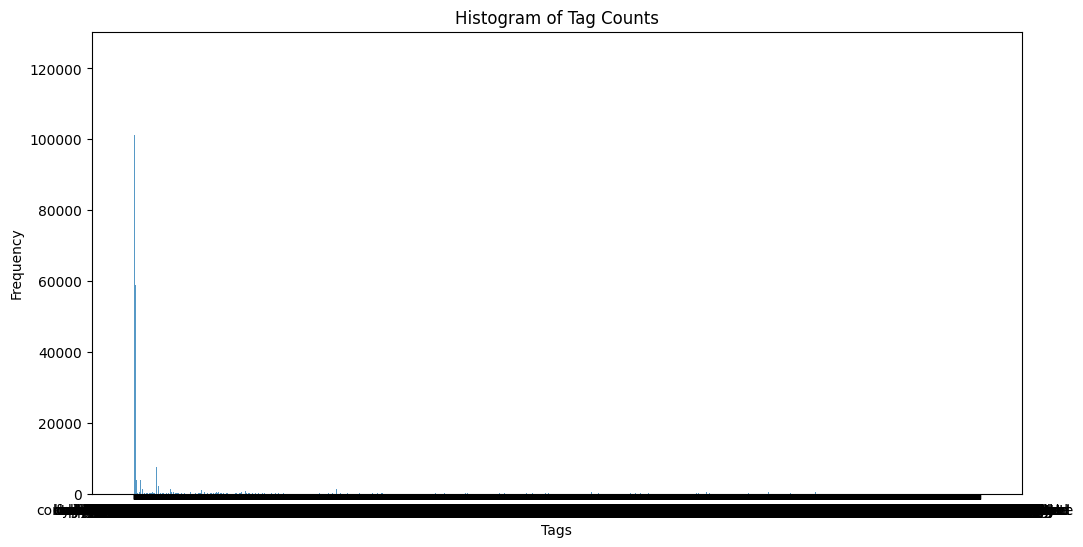

TypeError: ignored

<Figure size 1200x600 with 0 Axes>

In [22]:



# Assume 'tags' is your DataFrame with a column 'Tag'
# Replace 'column_name' with the appropriate column name for your dataset

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(tags['Tag'], bins=15, kde=False)
plt.title('Histogram of Tag Counts')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

# Boxplot
#3plt.figure(figsize=(12, 6))
#sns.boxplot(x='Tag', data=tags)
##plt.title('Boxplot of Tag Counts')
##plt.xlabel('Tags')
##plt.ylabel('Tag Counts')
##plt.xticks(rotation='vertical')
##plt.show()

# Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Tag', data=tags, order=pd.value_counts(tags['Tag']).index[:15])
plt.title('Count Plot of Top 15 Tags')
plt.xlabel('Tags')
plt.ylabel('Tag Counts')
plt.xticks(rotation='vertical')
plt.show()

# Correlation Matrix Heatmap
correlation_matrix = tags.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair Plot
sns.pairplot(tags.sample(500), height=2)
plt.suptitle('Pair Plot of Sampled Data', y=1.02)
plt.show()


In [11]:
import datetime
ques['datetime'] = pd.to_datetime(ques['CreationDate'])
ques.set_index('datetime', inplace=True)

In [12]:
weeklyQues = ques.resample('M').count()
weeklyQues.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
datetime,,,,,,,
2008-08-31 00:00:00+00:00,410,405,410,51,410,410,410
2008-09-30 00:00:00+00:00,1493,1380,1493,139,1493,1493,1493
2008-10-31 00:00:00+00:00,1449,1323,1449,108,1449,1449,1449
2008-11-30 00:00:00+00:00,1265,1119,1265,63,1265,1265,1265
2008-12-31 00:00:00+00:00,1209,1072,1209,68,1209,1209,1209


<Axes: xlabel='datetime'>

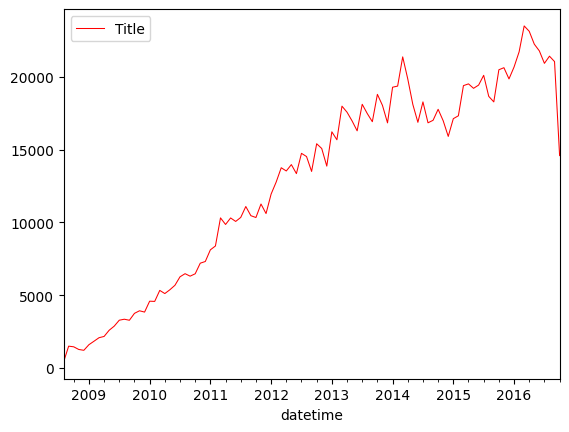

In [13]:
weeklyQues['datetime'] = weeklyQues.index
weeklyQues.plot(x='datetime', y='Title', kind='line', lw=0.75, c='r')

In [14]:
#tags.info()
tags['Tag'] = tags['Tag'].astype(str)
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))

In [15]:
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags})
grouped_tags_final.head()
grouped_tags.reset_index()

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction
...,...,...
1264211,40143210,php .htaccess
1264212,40143300,google-bigquery
1264213,40143340,android android-studio
1264214,40143360,javascript vue.js


In [16]:
ques.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)

In [17]:
score_gt_5 = ques['Score'] >= 5
ques = ques[score_gt_5]
ques.head()
ques.isnull().sum()
ques.duplicated().sum()

0

In [18]:
merged_ques = ques.merge(grouped_tags_final, on='Id')

merged_ques.drop(columns=['Id', 'Score'], inplace=True)
merged_ques.head(2)


merged_ques['Tags'] = merged_ques['Tags'].apply(lambda x: x.split())
flat_list = [item for sublist in merged_ques['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]


def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

merged_ques['Tags'] = merged_ques['Tags'].apply(lambda x: most_common(x))
merged_ques['Tags'] = merged_ques['Tags'].apply(lambda x: x if len(x)>0 else None)



ValueError: ignored